In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def get_score(context_size, model, category):
    
    disk_dir = "/mnt/data-poseidon/sumire/thesis"
    """
    if context_size == "1-1": 
        lang_list = os.listdir(disk_dir + f"/{context_size}")
    """
    lang_list = ["ar", "fr", "ja", "ko", "de", "zh"] #  , "zh", 
    
    for id, lang in enumerate(lang_list):
        lang_list[id] = lang_list[id].replace("en-", "")
    lang_scores = {}
        
    for lang in lang_list:
        if category == None:
            if context_size == "1-1":
                score_path = disk_dir+f'/{context_size}/en-{lang}/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-{lang}-{context_size}/test_score.txt'
            elif context_size == "9-1":
                score_path = disk_dir+f'/running/ted/eval_mt/test/en-{lang}/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-{lang}-{context_size}/test_score.txt'
            elif context_size == "2-1" or context_size == "3-1" or  context_size == "4-1" or context_size == "5-1":
                score_path = disk_dir+f'/{context_size}/en-{lang}/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-{lang}-{context_size}/test_score.txt'
    
            else:
                score_path = disk_dir+f'/running/cont_summ_ted/eval_mt/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'

        else:
            #score_path =  disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/categorized/{category}/{category}_test_score.txt'
            if context_size == "1-1":
                score_path =  disk_dir+f'/{context_size}/en-{lang}/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-{lang}-{context_size}/categorized/{category}/{category}_test_score.txt'
            elif context_size == "9-1":
                score_path = disk_dir+f'/ted/eval_mt/test/en-{lang}/Llama-2-70b-instruct-v2-usas-zs-p1-nsplit-{lang}-{context_size}/categorized/{category}/{category}_test_score.txt'
            else:
                score_path = disk_dir+f'/running/cont_summ_ted/eval_mt/en-{lang}/{model}-{lang}-{context_size}/categorized/{category}/{category}_test_score.txt'
        #score_path = disk_dir+f'/{context_size}/en-{lang}/{model}-{lang}-{context_size}/test_score.txt'
        if os.path.exists(score_path):
            with open(score_path,'r') as wf:
                lang_scores[lang] = wf.readlines()
                
        
        else:
            lang_scores[lang] = ["bleu: 0", "comet: 0", "gen_len: 0"]
            if model == "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit" and context_size in ["9-1","9-1to2-1", "9-1to3-1", "9-1to4-1", "9-1to5-1", "2-1", "3-1", "4-1", "5-1"] and category==None:
                print ("not founded", score_path)
    bleu_list = []
    comet_list = []
    for score_list, lang in zip(lang_scores.values(), lang_scores.keys()):
        bleu = score_list[0]
        if "sacrebleu" in bleu:
            bleu = bleu.replace("sacrebleu: ", "")
        else:
            bleu = bleu.replace("bleu: ", "")
        bleu = bleu.replace("\n", "")
        bleu = float(bleu)
        
        comet = score_list[1]
        print (lang, score_list, comet)
        comet = comet.replace("comet: ", "")
        comet = comet.replace("\n", "")
        comet = float(comet)
        bleu_list.append(bleu)
        comet_list.append(comet)
    return comet_list, bleu_list, lang_list


In [3]:
def get_and_return_scores(scenario, model, category):
    comet_list, bleu_list, lang_list = get_score(scenario, model, category)
    scores = {
        'model': model,
        'scenario': scenario,
        'category': category,
        'comet_scores': comet_list,
        'bleu_scores': bleu_list,
    }
    return scores, lang_list


models = [
         "Llama-2-70b-instruct-v2-sum-distilroberta-ted",
         "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit"
         ]
scenarios = ["9-1","9-1to2-1", "9-1to3-1", "9-1to4-1", "9-1to5-1", "2-1", "3-1", "4-1", "5-1"] 
categories = [None, "muda", "pronouns", "lexical_cohesion", "formality", "verb_form"]
results = []


for model in models:
    for scenario in scenarios:
        for category in categories:
            #print (scenario)
            scores, lang_list = get_and_return_scores(scenario, model, category)
            results.append(scores)


# Now you have a list of dictionaries containing the scores for each model and scenario
# You can access the results as needed
for result in results:
    if  result['model'] == "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit":
        print(f"Model: {result['model']}, Scenario: {result['scenario']}, Category: {result['category']}")
        print(f"COMET Scores: {result['comet_scores']}")
        print(f"BLEU Scores: {result['bleu_scores']}")
        print()


ar ['sacrebleu: 9.7696\n', 'comet: 0.7129\n'] comet: 0.7129

fr ['sacrebleu: 38.1473\n', 'comet: 0.8187\n'] comet: 0.8187

ja ['sacrebleu: 10.7793\n', 'comet: 0.7891\n'] comet: 0.7891

ko ['sacrebleu: 10.6327\n', 'comet: 0.7816\n'] comet: 0.7816

de ['sacrebleu: 29.2967\n', 'comet: 0.8105\n'] comet: 0.8105

zh ['sacrebleu: 24.3976\n', 'comet: 0.7833\n'] comet: 0.7833

ar ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
fr ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
ja ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
ko ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
de ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
zh ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
ar ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
fr ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
ja ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
ko ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
de ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
zh ['bleu: 0', 'comet: 0', 'gen_len: 0'] comet: 0
ar ['bleu: 0', 'comet: 0', 'g

In [6]:
print (lang_list)

['ar', 'fr', 'ja', 'ko', 'de', 'zh']


In [7]:
[0.0]*len(lang_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

## Original Code for comparing 9-1

In [42]:
def scores_plot(model, category, relative, base_model, comet, bleu, fontsize,  right_adjust):
    plt.rcParams.update({'font.size': fontsize})
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.07  # The width of the bars
    
    model_scores = []
    for result in results:
        if result['model'] == f'{model}':
            model_scores.append(result)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    
    #base_models = ["xglm", "llama", "Llama-2-70b-instruct-v2", "Llama-2-70b-instruct-v2-usas-zs-p1" ]
    """
    for i in model_scores:
        if i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
            #for base_model in base_models:
                #if base_model in model:
            for result in results:
                if result["model"] == base_model and result["scenario"] =="1-1":
                    print ("base_model 1-1 exists")
                    rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'{model} 1-1')
    """
    
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'{model} 1-1')  
            
            
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["comet_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} ante-1')
    
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
         for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["comet_scores"], width, label=f'{model} 1-1')  
        
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x -width  , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["comet_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 10-1')
            
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["comet_scores"], width, label=f'{model} 10-1to5-1')
            #elif i['scenario'] == 'ante-1':
                #rects9 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} ante-1')
        
    else: ###ted sum 
        print ("plotting our model")
        for i in model_scores:
            if i['category']==category:
                if relative == False:
                    
                    if i['scenario'] == '9-1' and i["comet_scores"] == [0.0]*len(lang_list):
                        print ("9-1 not exist")
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="9-1":
                                score = result["comet_scores"]
                                #rects1 = ax.bar(x - width*4, score, width, label= "n_src=0, n_tgt=0")# 1-1
                    elif i['scenario'] == '9-1' and i["comet_scores"] != [0.0]*len(lang_list):
                        print ("1-1 exists")
                        score = i["comet_scores"]
                        #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0" )#"1-1"
                    else: 
                        score = i["comet_scores"]

                else: #Show relatice score for 1-1 which should be zero
                    
                    if i['category']==category:
                        print ("hei0")
                        print (i['scenario'], i["comet_scores"])
                        if i['scenario'] == '9-1'and i["comet_scores"] != [0.0]*len(lang_list):
                            print ("hei1")
                            base_score = i["comet_scores"]
                            #score = [0.0]*len(lang_list)
                            #rects1 = ax.bar(x - width*4, score, width, label= "n_src=0, n_tgt=0")#"1-1"
                            
                        elif i['scenario'] == '9-1' and i["comet_scores"] == [0.0]*len(lang_list):
                            print ("hei2")
                            for result in results:
                                if result["model"] == base_model and result["scenario"] =="9-1":
                                    base_score = result["comet_scores"]
                                    #score = [0.0]*len(lang_list)
                                    #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")# 1-1
                
                    score = [context - base if context != 0.0 else 0 for context, base in zip(i["comet_scores"], base_score)]
                    
              
                if i['scenario'] == '9-1to2-1':
                    rects2 = ax.bar(x - width*1.5, score, width, label="n_sum_src=1")#label=i['scenario']
                elif i['scenario'] == '9-1to3-1':
                    rects3 = ax.bar(x - width*0.5, score, width, label="n_sum_src=2")
                elif i['scenario'] == '9-1to4-1':
                    rects4= ax.bar(x + width*0.5 , score, width, label="n_sum_src=3")
                elif i['scenario'] == '9-1to5-1':
                    rects5 = ax.bar(x +width*1.5 , score, width, label="n_sum_src=4")
                #elif i['scenario'] == '9-1':
                    #rects6 = ax.bar(x + width*1 , score, width, label="n_src=8")
                """
                elif i['scenario'] == '1-2':
                    rects6 = ax.bar(x + width*1 , score, width, label="n_tgt=1")
                elif i['scenario'] == '1-3':
                    rects7 = ax.bar(x+ width*2, score, width, label="n_tgt=2")
                elif i['scenario'] == '1-4':
                    print ("1-4", score)
                    rects8 = ax.bar(x+ width*3, score, width, label="n_tgt=3")
                elif i['scenario'] == '1-5':
                    rects9 = ax.bar(x+ width*4, score, width,label="n_tgt=4")
                """
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(comet[0], comet[1])
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel(u'Δ Scores')
    
    """
    if relative == False:
        if category == None:
            ax.set_title(f'-{model}- COMET')
        else:
            ax.set_title(f'{category}-{model}- COMET')
    else:
        if category == None:
            ax.set_title(f'-Score gap with context-agnostic model (COMET)')
        else:
            ax.set_title(f'Score gap with ontext-agnostic model-{category}-(COMET)')
    """    
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    fig.subplots_adjust(right=right_adjust)
    ax.legend(
        loc="center left",
        bbox_to_anchor=(0.8, 0.5),
        bbox_transform=fig.transFigure
              )

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot a
            
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["bleu_scores"], width, label=f'{model} 1-1')     
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["bleu_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*1, i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} ante-1')
                
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
        for i in model_scores:     
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["bleu_scores"], width, label=f'{model} 1-1')  
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x - width  , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["bleu_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 10-1')
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["bleu_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["bleu_scores"], width, label=f'{model} 10-1to5-1')
    
    else: # ted sum
        print ("plotting our model")
        for i in model_scores:
            if i['category']==category:
                if relative == False:
                    
                    if i['scenario'] == '9-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                        print ("1-1 not exist")
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="9-1":
                                score = result["bleu_scores"]
                                #rects1 = ax.bar(x - width*4, score, width, label= f'9-1')
                    elif i['scenario'] == '9-1' and i["bleu_scores"] != [0.0]*len(lang_list):
                        print ("1-1 exists")
                        score = i["bleu_scores"]
                        #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")
                    else: 
                        score = i["bleu_scores"]

                else: #Show relatice score for 1-1 which should be zero
                    if i['category']==category:
                        if i['scenario'] == '9-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                            base_score = i["bleu_scores"]
                            #score = [0.0]*len(lang_list)
                            #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")
                            
                        elif i['scenario'] == '9-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                            for result in results:
                                if result["model"] == base_model and result["scenario"] =="9-1":
                                    base_score = result["bleu_scores"]
                                    #score = [0.0]*len(lang_list)
                                    #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")

                    score = [context - base if context != 0.0 else 0 for context, base in zip(i["bleu_scores"], base_score)]
                    
                print ("score gap", score)
                if i['scenario'] == '9-1to2-1':
                    rects2 = ax.bar(x - width*1.5, score, width, label="n_sum_src=1")
                elif i['scenario'] == '9-1to3-1':
                    rects3 = ax.bar(x - width*0.5, score, width, label="n_sum_src=2")
                elif i['scenario'] == '9-1to4-1':
                    rects4= ax.bar(x + width*0.5 , score, width, label="n_sum_src=3")
                elif i['scenario'] == '9-1to5-1':
                    rects5 = ax.bar(x+width*1.5 , score, width, label="n_sum_src=4")
                    
                #elif i['scenario'] == '9-1':
                    #rects5 = ax.bar(x+ width*1 , score, width, label="n_src=8")
                """
                elif i['scenario'] == '9-1to1-2':
                    rects6 = ax.bar(x + width*1 , score, width, label="n_tgt=1")
                elif i['scenario'] == '9-1to1-3':
                    rects7 = ax.bar(x+ width*2, score, width, label="n_tgt=2")
                elif i['scenario'] == '9-1to1-4':
                    rects8 = ax.bar(x+ width*3, score, width, label="n_tgt=3")
                elif i['scenario'] == '9-1to1-5':
                    rects9 = ax.bar(x+ width*4, score, width, label="n_tgt=4")
                """
    # Set a specific range for the y-axis (for example, from 0 to 10
    ax.set_ylim(bleu[0], bleu[1])
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel(u'Δ Scores')
    
    """
    if relative == False:
        if category == None:
            ax.set_title(f'{model}- BLEU')
        else:
            ax.set_title(f'{category}-{model}- BLEU')
    if relative == True:
        if category == None:
            ax.set_title(f'Score Gap with context-agnostic model- (BLEU)')
        else:
            ax.set_title(f'Score Gap with context-agnostic model-{category}- (BLEU)')
    """
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    fig.subplots_adjust(right=right_adjust)
    ax.legend(
        loc="center left",
        bbox_to_anchor=(0.8, 0.5),
        bbox_transform=fig.transFigure
              )

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    

## change code 

In [37]:
def scores_plot(model, category, relative, compare_each_size, base_model, comet, bleu, fontsize,  right_adjust):
    plt.rcParams.update({'font.size': fontsize})
    ### COMET
    # Generating positions for the bars
    x = np.arange(len(lang_list))  # The label locations
    width = 0.07  # The width of the bars
    
    model_scores = []
    for result in results:
        if result['model'] == f'{model}':
            model_scores.append(result)

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    
    #base_models = ["xglm", "llama", "Llama-2-70b-instruct-v2", "Llama-2-70b-instruct-v2-usas-zs-p1" ]
    
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["comet_scores"], width, label=f'{model} 1-1')  
            
            
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["comet_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} ante-1')
    
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
         for i in model_scores:
            if i['scenario'] == '1-1'and i["comet_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["comet_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["comet_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["comet_scores"], width, label=f'{model} 1-1')  
        
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["comet_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["comet_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["comet_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x -width  , i["comet_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["comet_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["comet_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["comet_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["comet_scores"], width, label=f'{model} 10-1')
            
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["comet_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["comet_scores"], width, label=f'{model} 10-1to5-1')
            #elif i['scenario'] == 'ante-1':
                #rects9 = ax.bar(x+ width*5, i["comet_scores"], width, label=f'{model} ante-1')
        
    else: ###ted sum 
        print ("plotting our model")
        for i in model_scores:
            if i['category']==category:
                if relative == False:
                    
                    if i['scenario'] == '9-1' and i["comet_scores"] == [0.0]*len(lang_list):
                        print ("9-1 not exist")
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="9-1":
                                score = result["comet_scores"]
                                #rects1 = ax.bar(x - width*4, score, width, label= "n_src=0, n_tgt=0")# 1-1
                    elif i['scenario'] == '9-1' and i["comet_scores"] != [0.0]*len(lang_list):
                        print ("1-1 exists")
                        score = i["comet_scores"]
                        #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0" )#"1-1"
                    else: 
                        score = i["comet_scores"]

                
                else: #Show relatice score for 1-1 which should be zero
                    if i['category']==category:
                        print ("hei0")
                        print (i['scenario'], i["comet_scores"])
                        if i['scenario'] == '9-1'and i["comet_scores"] != [0.0]*len(lang_list):
                            print ("hei1")
                            base_score = i["comet_scores"]
                            #score = [0.0]*len(lang_list)
                            #rects1 = ax.bar(x - width*4, score, width, label= "n_src=0, n_tgt=0")#"1-1"
                            
                        elif i['scenario'] == '9-1' and i["comet_scores"] == [0.0]*len(lang_list):
                            print ("hei2")
                            for result in results:
                                if result["model"] == base_model and result["scenario"] =="9-1":
                                    base_score = result["comet_scores"]
                                    #score = [0.0]*len(lang_list)
                                    #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")# 1-1
                
                    score = [context - base if context != 0.0 else 0 for context, base in zip(i["comet_scores"], base_score)]
                    
              
                if i['scenario'] == '9-1to2-1':
                  
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="2-1" and result["category"]== None:
                                print ("compareeeeeee1")
                                print (result)
                                base_score=result["comet_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["comet_scores"], base_score)]
                                print ("scoreeee", score)
                    else:
                      
                        score=score
                    
                    rects2 = ax.bar(x - width*1.5, score, width, label="n_sum_src=1")#label=i['scenario']
                
                
                
                elif i['scenario'] == '9-1to3-1':
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="3-1" and result["category"]== None:
                                print (result["model"], result["scenario"])
                                print ("compareeeeeee2")
                                base_score=result["comet_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["comet_scores"], base_score)]
                    else:
                        score=score
                    rects3 = ax.bar(x - width*0.5, score, width, label="n_sum_src=2")#label=i['scenario']
                
                elif i['scenario'] == '9-1to4-1':
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="4-1" and result["category"]== None:
                                print ("compareeeeeee3")
                                base_score=result["comet_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["comet_scores"], base_score)]
                    else:
                        score=score
                    rects4= ax.bar(x + width*0.5 , score, width, label="n_sum_src=3")
                
                elif i['scenario'] == '9-1to5-1':
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="5-1" and result["category"]== None:
                                print ("compareeeeeee4")
                                base_score=result["comet_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["comet_scores"], base_score)]
                    else:
                        score=score
                    rects5 = ax.bar(x +width*1.5 , score, width, label="n_sum_src=4")
                #elif i['scenario'] == '9-1':
                    #rects6 = ax.bar(x + width*1 , score, width, label="n_src=8")
            
                
                    
    # Set a specific range for the y-axis (for example, from 0 to 10)
    ax.set_ylim(comet[0], comet[1])
    
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel(u'Δ Scores')
    
    """
    if relative == False:
        if category == None:
            ax.set_title(f'-{model}- COMET')
        else:
            ax.set_title(f'{category}-{model}- COMET')
    else:
        if category == None:
            ax.set_title(f'-Score gap with context-agnostic model (COMET)')
        else:
            ax.set_title(f'Score gap with ontext-agnostic model-{category}-(COMET)')
    """    
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    fig.subplots_adjust(right=right_adjust)
    ax.legend(
        loc="center left",
        bbox_to_anchor=(0.8, 0.5),
        bbox_transform=fig.transFigure
              )

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    
    
    ###BLEU 
    # Generating positions for the bars
    #x = np.arange(len(lang_list))  # The label locations
    #width = 0.1  # The width of the bars

    fig, ax = plt.subplots(figsize=(10, len(lang_list)))
    
    if model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sp1-sp2":
        print ("yes")
        for i in model_scores:
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*4, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot a
            
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*4, result["bleu_scores"], width, label=f'{model} 1-1')     
            elif i['scenario'] == '2-1':
                rects2 = ax.bar(x - width*3, i["bleu_scores"], width, label=f'{model} 2-1')
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*2, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*1, i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x, i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x + width*1 , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*2, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '2-1-ante':
                rects8 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 2-1(ante sent)')
            elif i['scenario'] == 'ante-1':
                rects9 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} ante-1')
                
    elif model == "Llama-2-70b-instruct-v2-ctpro-zs-p1-sum-distilroberta":
        for i in model_scores:     
            if i['scenario'] == '1-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                print("equivalent 1-1 exists")
                rects1 = ax.bar(x - width*5, i["bleu_scores"], width, label= f'{model} 1-1') # Ja, FR is not continuous shot anymore
            elif i['scenario'] == '1-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                for result in results:
                    if result["model"] == base_model and result["scenario"] =="1-1":
                        rects1 = ax.bar(x - width*5, result["bleu_scores"], width, label=f'{model} 1-1')  
            elif i['scenario'] == '3-1':
                rects3 = ax.bar(x - width*4, i["bleu_scores"], width, label=f'{model} 3-1')
            elif i['scenario'] == '4-1':
                rects4= ax.bar(x - width*3 , i["bleu_scores"], width, label=f'{model} 4-1')
            elif i['scenario'] == '5-1':
                rects5 = ax.bar(x - width*2 , i["bleu_scores"], width, label=f'{model} 5-1')
            elif i['scenario'] == '6-1':
                rects6 = ax.bar(x - width  , i["bleu_scores"], width, label=f'{model} 6-1')
            elif i['scenario'] == '7-1':
                rects7 = ax.bar(x+ width*0, i["bleu_scores"], width, label=f'{model} 7-1')
            elif i['scenario'] == '8-1':
                rects8 = ax.bar(x+ width*1, i["bleu_scores"], width, label=f'{model} 8-1')
            elif i['scenario'] == '9-1':
                rects2 = ax.bar(x + width*2, i["bleu_scores"], width, label=f'{model} 9-1')
            elif i['scenario'] == '10-1':
                rects9 = ax.bar(x+ width*3, i["bleu_scores"], width, label=f'{model} 10-1')
            elif i['scenario'] == '10-1to3-1':
                rects10 = ax.bar(x+ width*4, i["bleu_scores"], width, label=f'{model} 10-1to3-1')
            elif i['scenario'] == '10-1to4-1':
                rects11 = ax.bar(x+ width*5, i["bleu_scores"], width, label=f'{model} 10-1to4-1')
            elif i['scenario'] == '10-1to5-1':
                rects12 = ax.bar(x+ width*6, i["bleu_scores"], width, label=f'{model} 10-1to5-1')
    
    else: # ted sum
        print ("plotting our model")
        for i in model_scores:
            if i['category']==category:
                if relative == False:
                    if i['scenario'] == '9-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                        print ("1-1 not exist")
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="9-1":
                                score = result["bleu_scores"]
                                #rects1 = ax.bar(x - width*4, score, width, label= f'9-1')
                    elif i['scenario'] == '9-1' and i["bleu_scores"] != [0.0]*len(lang_list):
                        print ("1-1 exists")
                        score = i["bleu_scores"]
                        #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")
                    else: 
                        score = i["bleu_scores"]

                else: #Show relatice score for 1-1 which should be zero
                    if i['category']==category:
                        if i['scenario'] == '9-1'and i["bleu_scores"] != [0.0]*len(lang_list):
                            base_score = i["bleu_scores"]
                            #score = [0.0]*len(lang_list)
                            #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")
                            
                        elif i['scenario'] == '9-1' and i["bleu_scores"] == [0.0]*len(lang_list):
                            for result in results:
                                if result["model"] == base_model and result["scenario"] =="9-1":
                                    base_score = result["bleu_scores"]
                                    #score = [0.0]*len(lang_list)
                                    #rects1 = ax.bar(x - width*4, score, width, label="n_src=0, n_tgt=0")

                    score = [context - base if context != 0.0 else 0 for context, base in zip(i["bleu_scores"], base_score)]
                    
                print ("score gap", score)
                if i['scenario'] == '9-1to2-1':
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="2-1" and result["category"]== None:
                                base_score=result["bleu_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["bleu_scores"], base_score)]
                    else:
                        score=score
                    rects2 = ax.bar(x - width*1.5, score, width, label="n_sum_src=1")
                elif i['scenario'] == '9-1to3-1':
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="3-1" and result["category"]== None:
                                base_score=result["bleu_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["bleu_scores"], base_score)]
                    else:
                        score=score
                    rects3 = ax.bar(x - width*0.5, score, width, label="n_sum_src=2")
                elif i['scenario'] == '9-1to4-1':
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="4-1" and result["category"]== None:
                                base_score=result["bleu_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["bleu_scores"], base_score)]
                    else:
                        score=score
                    rects4= ax.bar(x + width*0.5 , score, width, label="n_sum_src=3")
                elif i['scenario'] == '9-1to5-1':
                    if compare_each_size:
                        for result in results:
                            if result["model"] == base_model and result["scenario"] =="5-1" and result["category"]== None:
                                base_score=result["bleu_scores"]
                                score = [context - base if context != 0.0 else 0 for context, base in zip(i["bleu_scores"], base_score)]
                    else:
                        score=score
                    rects5 = ax.bar(x+width*1.5 , score, width, label="n_sum_src=4")
                    
                #elif i['scenario'] == '9-1':
                    #rects5 = ax.bar(x+ width*1 , score, width, label="n_src=8")
                """
                elif i['scenario'] == '9-1to1-2':
                    rects6 = ax.bar(x + width*1 , score, width, label="n_tgt=1")
                elif i['scenario'] == '9-1to1-3':
                    rects7 = ax.bar(x+ width*2, score, width, label="n_tgt=2")
                elif i['scenario'] == '9-1to1-4':
                    rects8 = ax.bar(x+ width*3, score, width, label="n_tgt=3")
                elif i['scenario'] == '9-1to1-5':
                    rects9 = ax.bar(x+ width*4, score, width, label="n_tgt=4")
                """
    # Set a specific range for the y-axis (for example, from 0 to 10
    ax.set_ylim(bleu[0], bleu[1])
    # Adding labels and title
    ax.set_xlabel('Languages')
    ax.set_ylabel(u'Δ Scores')
    
    """
    if relative == False:
        if category == None:
            ax.set_title(f'{model}- BLEU')
        else:
            ax.set_title(f'{category}-{model}- BLEU')
    if relative == True:
        if category == None:
            ax.set_title(f'Score Gap with context-agnostic model- (BLEU)')
        else:
            ax.set_title(f'Score Gap with context-agnostic model-{category}- (BLEU)')
    """
    ax.set_xticks(x)
    ax.set_xticklabels(lang_list)
    fig.subplots_adjust(right=right_adjust)
    ax.legend(
        loc="center left",
        bbox_to_anchor=(0.8, 0.5),
        bbox_transform=fig.transFigure
              )

    # Adjust the x-axis limits for better visualization
    ax.set_xlim(-0.5, len(lang_list) - 0.5)

    # Displaying the plot
    plt.tight_layout()
    plt.show()
    

# Summarized Context

plotting our model
hei0
9-1 [0.7129, 0.8187, 0.7891, 0.7816, 0.8105, 0.7833]
hei1
hei0
9-1to2-1 [0.7522, 0.8351, 0.8139, 0.8123, 0.8264, 0.8081]
compareeeeeee1
{'model': 'Llama-2-70b-instruct-v2-usas-zs-p1-nsplit', 'scenario': '2-1', 'category': None, 'comet_scores': [0.7621, 0.8483, 0.8289, 0.8307, 0.8391, 0.8233], 'bleu_scores': [14.189, 39.1726, 12.277, 15.7643, 29.6326, 27.3263]}
scoreeee [-0.00990000000000002, -0.0132000000000001, -0.015000000000000013, -0.018399999999999972, -0.012699999999999934, -0.015199999999999991]
hei0
9-1to3-1 [0.7547, 0.8424, 0.8236, 0.8188, 0.8345, 0.8151]
Llama-2-70b-instruct-v2-usas-zs-p1-nsplit 3-1
compareeeeeee2
hei0
9-1to4-1 [0.7596, 0.8448, 0.8262, 0.8212, 0.8342, 0.8174]
compareeeeeee3
hei0
9-1to5-1 [0.756, 0.845, 0.8273, 0.8243, 0.8346, 0.8174]
compareeeeeee4
hei0
2-1 [0.7621, 0.8483, 0.8289, 0.8307, 0.8391, 0.8233]
hei0
3-1 [0.758, 0.8486, 0.8287, 0.8311, 0.8403, 0.8211]
hei0
4-1 [0.7566, 0.8479, 0.8273, 0.827, 0.8402, 0.8206]
hei0
5-1 [0.7545, 

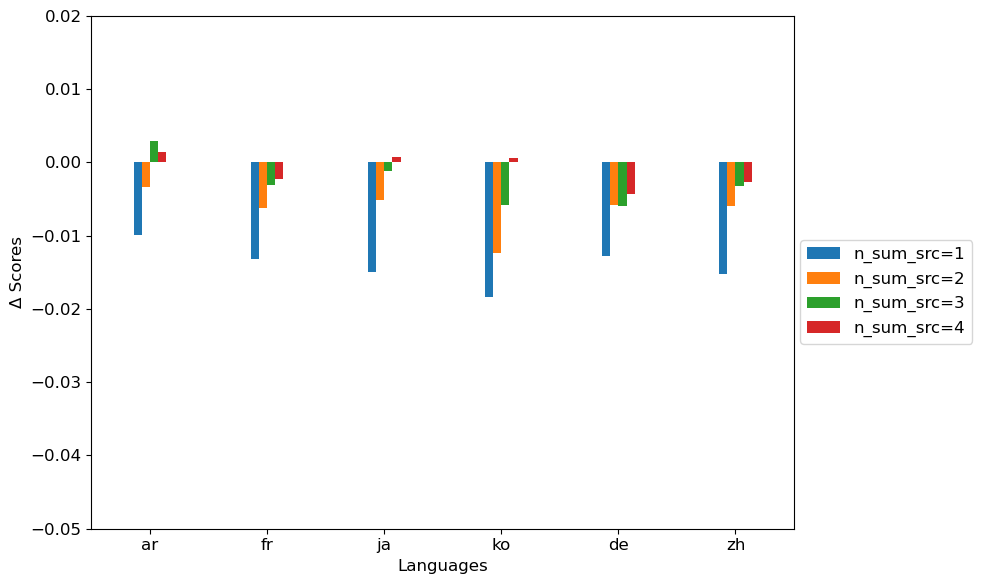

plotting our model
score gap [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
score gap [3.6579999999999995, 1.1503000000000014, 1.4453000000000014, 5.272, -0.091700000000003, 3.4178999999999995]
score gap [-0.7607999999999997, 0.02740000000000009, -0.23919999999999852, -0.000700000000000145, -0.5740000000000016, 0.051600000000000534]
score gap [0.32920000000000016, 0.22570000000000334, 0.152099999999999, -0.34640000000000093, 0.30020000000000024, 0.33810000000000073]
score gap [-0.30799999999999983, 0.5373999999999981, 0.11120000000000019, 0.3699999999999992, -0.8265999999999991, 0.9558999999999997]
score gap [1.2812999999999999, 0.28359999999999985, 0.6732999999999993, 1.9004000000000012, -0.00560000000000116, 0.9750000000000014]
score gap [0.3634000000000004, 0.40459999999999496, 0.4281000000000006, 1.9263000000000012, -0.2920000000000016, 1.0854]
score gap [0.35079999999999956, 0.2930999999999955, 0.33610000000000007, 1.0690000000000008, 0.3136999999999972, -0.08749999999999858]
score gap [0.0, 0.0,

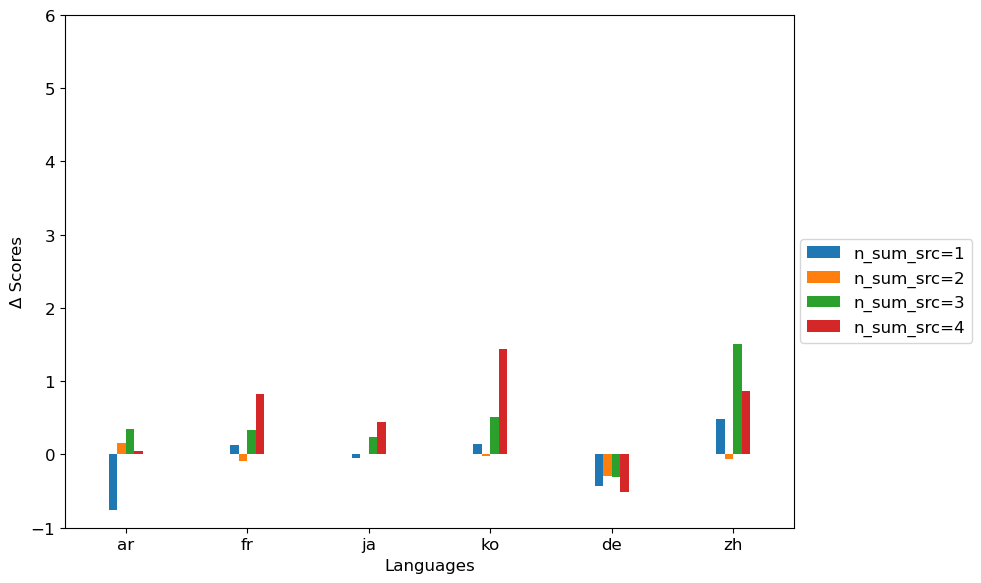

In [38]:
scores_plot(model="Llama-2-70b-instruct-v2-sum-distilroberta-ted", category = None, relative = True, compare_each_size=True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(-0.05,0.02), bleu=(-1,6), fontsize=12, right_adjust=0.8) 

plotting our model
1-1 exists


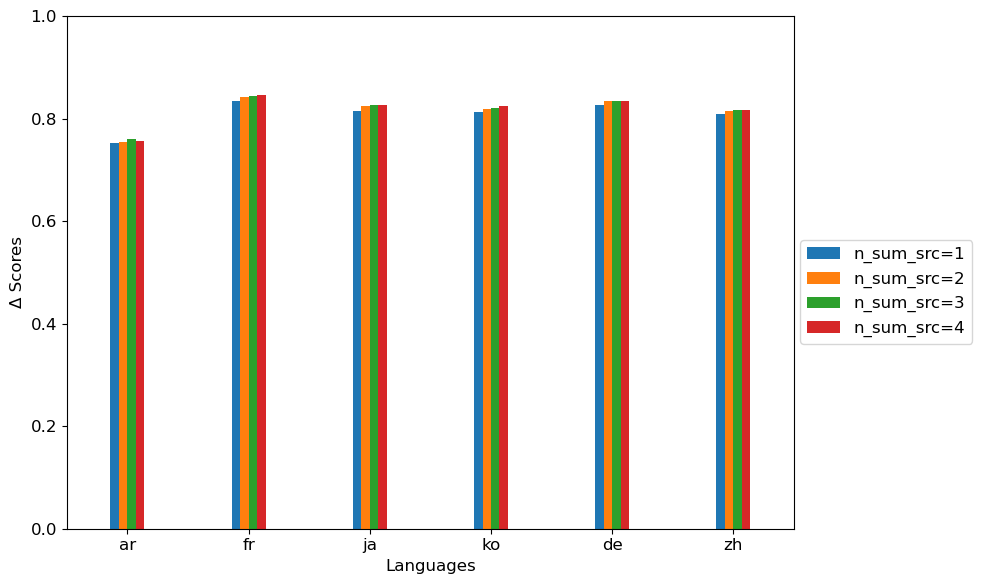

plotting our model
1-1 exists
score gap [9.7696, 38.1473, 10.7793, 10.6327, 29.2967, 24.3976]
score gap [13.4276, 39.2976, 12.2246, 15.9047, 29.205, 27.8155]
score gap [13.4282, 39.2, 12.0378, 15.7636, 29.0586, 27.3779]
score gap [13.6003, 39.5193, 12.1839, 15.4438, 29.6464, 27.7748]
score gap [12.9505, 39.7195, 12.051, 15.3029, 29.1253, 27.2197]
score gap [14.189, 39.1726, 12.277, 15.7643, 29.6326, 27.3263]
score gap [13.2711, 39.2936, 12.0318, 15.7902, 29.3462, 27.4367]
score gap [13.2585, 39.1821, 11.9398, 14.9329, 29.9519, 26.2638]
score gap [12.9077, 38.889, 11.6037, 13.8639, 29.6382, 26.3513]


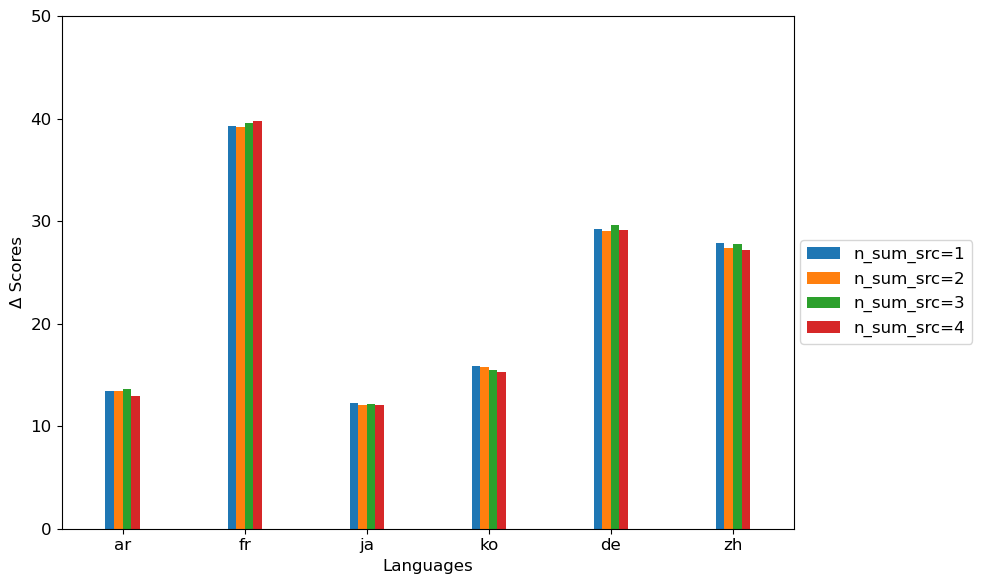

In [43]:
scores_plot(model="Llama-2-70b-instruct-v2-sum-distilroberta-ted", category = None, relative = False, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,1), bleu=(0,50), fontsize=12, right_adjust=0.8) 

plotting our model
hei0
9-1 [0.7129, 0.8187, 0.7891, 0.7816, 0.8105, 0.7833]
hei1
hei0
9-1to2-1 [0.7522, 0.8351, 0.8139, 0.8123, 0.8264, 0.8081]
hei0
9-1to3-1 [0.7547, 0.8424, 0.8236, 0.8188, 0.8345, 0.8151]
hei0
9-1to4-1 [0.7596, 0.8448, 0.8262, 0.8212, 0.8342, 0.8174]
hei0
9-1to5-1 [0.756, 0.845, 0.8273, 0.8243, 0.8346, 0.8174]
hei0
2-1 [0.7621, 0.8483, 0.8289, 0.8307, 0.8391, 0.8233]
hei0
3-1 [0.758, 0.8486, 0.8287, 0.8311, 0.8403, 0.8211]
hei0
4-1 [0.7566, 0.8479, 0.8273, 0.827, 0.8402, 0.8206]
hei0
5-1 [0.7545, 0.8472, 0.8265, 0.8237, 0.8389, 0.82]


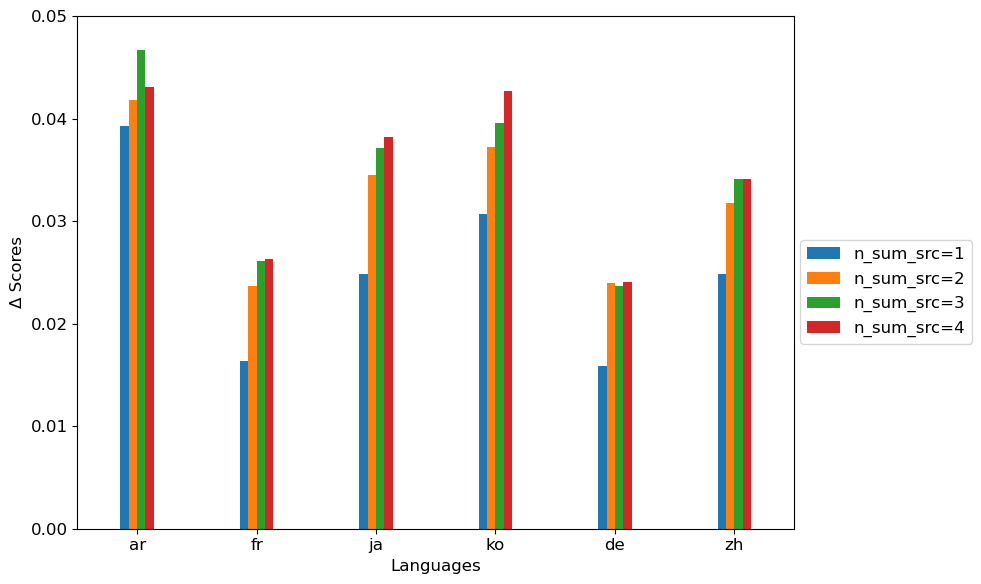

plotting our model
score gap [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
score gap [3.6579999999999995, 1.1503000000000014, 1.4453000000000014, 5.272, -0.091700000000003, 3.4178999999999995]
score gap [3.6586, 1.0527000000000015, 1.2585000000000015, 5.1309000000000005, -0.23810000000000286, 2.9802999999999997]
score gap [3.8307, 1.3719999999999999, 1.4046000000000003, 4.8111, 0.34969999999999857, 3.3771999999999984]
score gap [3.1808999999999994, 1.5721999999999952, 1.271700000000001, 4.6701999999999995, -0.171400000000002, 2.822099999999999]
score gap [4.4193999999999996, 1.0253000000000014, 1.4977, 5.131600000000001, 0.33589999999999876, 2.928699999999999]
score gap [3.5015, 1.1462999999999965, 1.2525000000000013, 5.157500000000001, 0.04949999999999832, 3.0390999999999977]
score gap [3.4888999999999992, 1.034799999999997, 1.1605000000000008, 4.3002, 0.6551999999999971, 1.8661999999999992]
score gap [3.1380999999999997, 0.7417000000000016, 0.8244000000000007, 3.2311999999999994, 0.3414999999999999

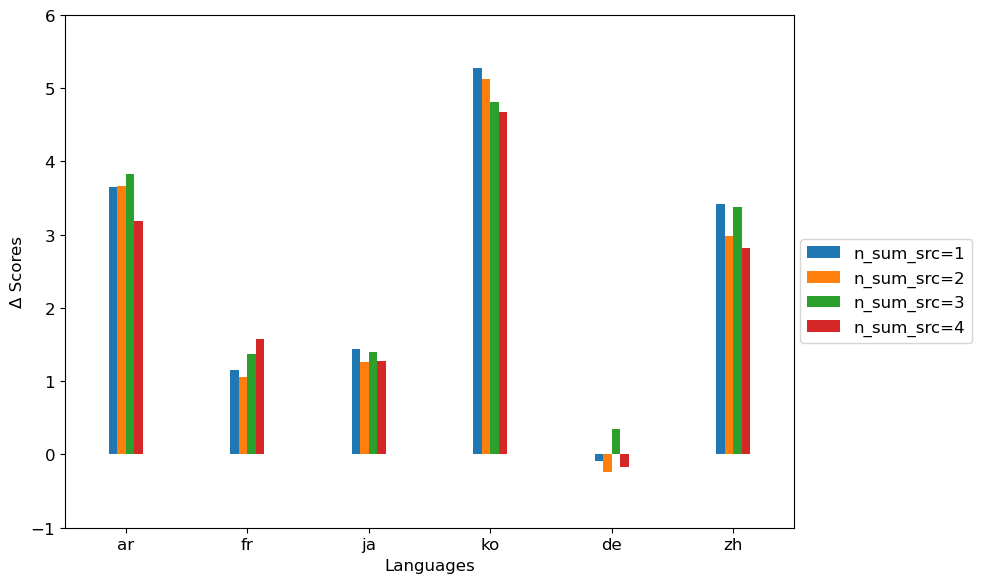

In [44]:
scores_plot(model="Llama-2-70b-instruct-v2-sum-distilroberta-ted", category = None, relative = True, base_model="Llama-2-70b-instruct-v2-usas-zs-p1-nsplit", comet=(0,0.05), bleu=(-1,6), fontsize=12, right_adjust=0.8) 